# KINGS COUNTRY HOUSING PRICES

### Import Libraries

In [334]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 300)

### Import Data

In [335]:
%store -r data

## Exploratory Data Analysis 

**Business Question 1:** What are the distributions of the different data set features?

### Distributions

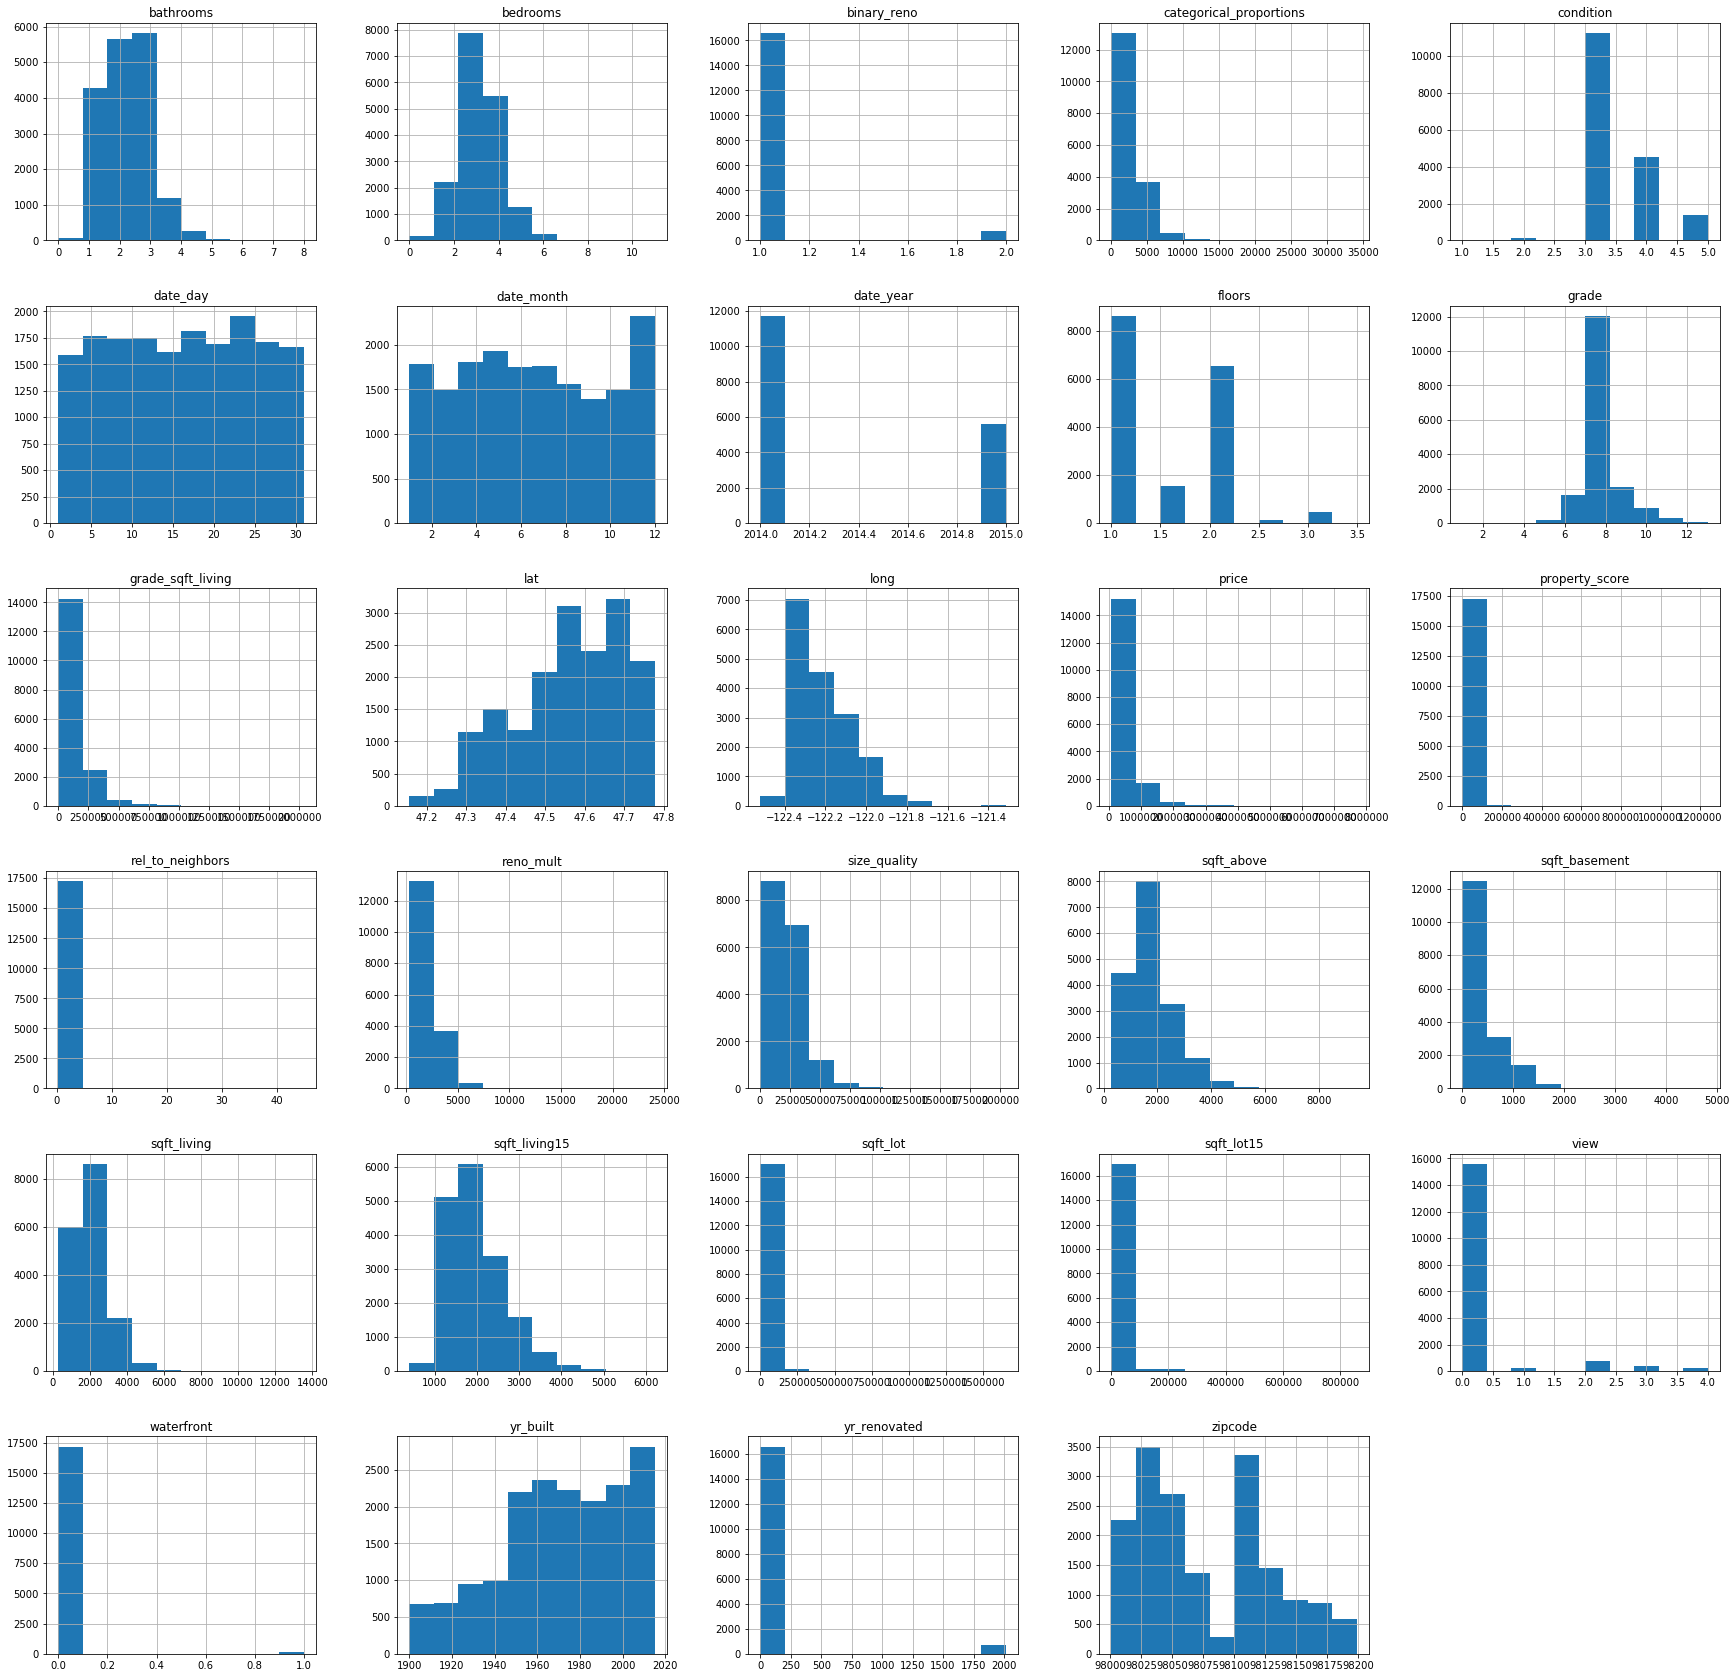

In [336]:
fig, ax = plt.subplots(figsize=(30,30))
data.hist(ax=ax)
plt.show()

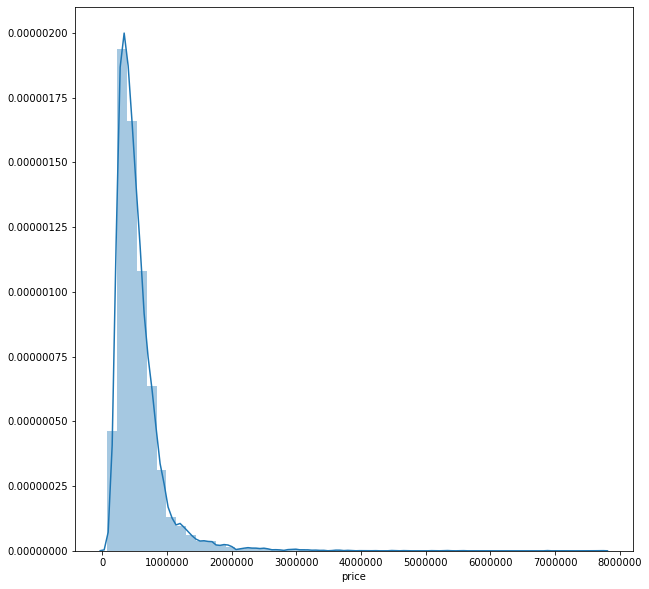

In [337]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data.price, ax = ax)

**Business Question 2:** What are the relationships between the data set features?

### Relationships

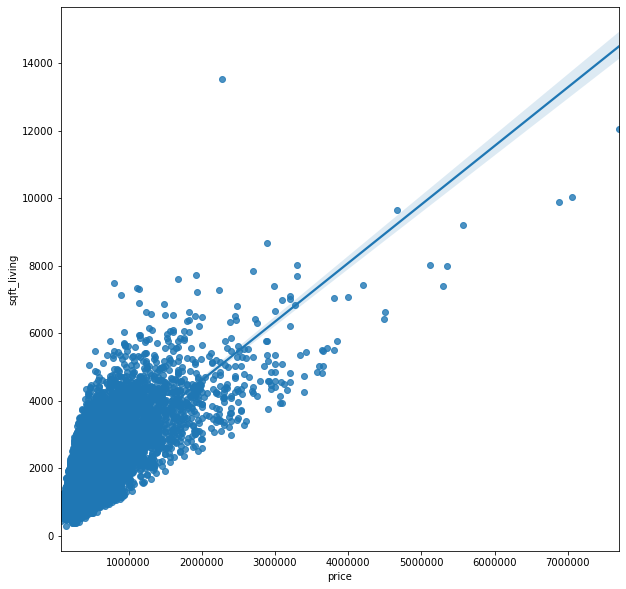

In [338]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(data.price, data.sqft_living)

In [339]:
correlation = data.corr()

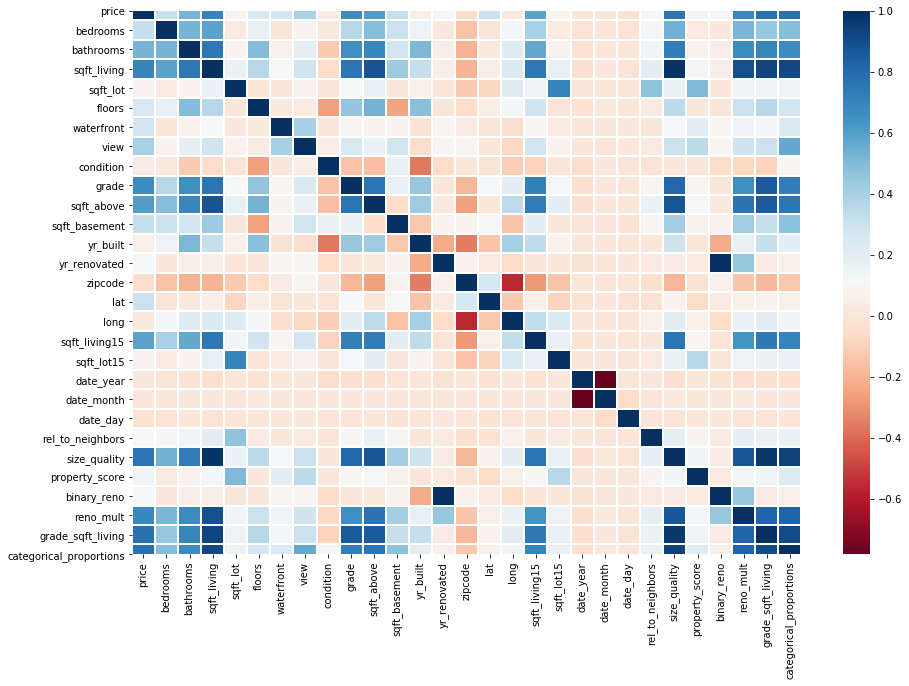

In [340]:
fig, ax = plt.subplots(figsize=(15,10))        
sns.heatmap(correlation, linewidths=1, ax=ax, xticklabels = correlation.columns, yticklabels = correlation.columns, cmap='RdBu')

**Business Question 3:** What are the biggest outliers in this data set?

### Outliers

In [341]:
desc_data = data.describe()

desc_data.loc['+3_std'] = desc_data.loc['50%'] + (desc_data.loc['std']*3)
desc_data.loc['-3_std'] = desc_data.loc['50%'] - (desc_data.loc['std']*3)

desc_data.loc['+5_std'] = desc_data.loc['50%'] + (desc_data.loc['std']*5)
desc_data.loc['-5_std'] = desc_data.loc['50%'] - (desc_data.loc['std']*5)

desc_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day,rel_to_neighbors,size_quality,property_score,binary_reno,reno_mult,grade_sqft_living,categorical_proportions
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,1.729000e+04,17290.000000
mean,5.407395e+05,3.370735,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,2014.323135,6.570561,15.664662,1.094478,23814.720763,1.667437e+03,1.041990,2178.304222,1.384719e+05,2875.190093
std,3.733190e+05,0.911923,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,0.467687,3.116999,8.595860,0.686899,13232.574581,1.671915e+04,0.200571,1121.485768,1.149709e+05,1792.627795
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,2014.000000,1.000000,1.000000,0.241527,580.000000,0.000000e+00,1.000000,290.000000,2.900000e+02,80.307692
25%,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,2014.000000,4.000000,8.000000,0.920833,14900.000000,0.000000e+00,1.000000,1440.000000,7.056000e+04,1753.230769
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,2014.000000,6.000000,16.000000,1.007399,20790.000000,0.000000e+00,1.000000,1951.000000,1.043700e+05,2455.076923
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,2015.000000,9.000000,23.000000,1.136559,29260.000000,0.000000e+00,1.000000,2620.000000,1.664000e+05,3463.384615
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,2015.000000,12.000000,31.000000,44.864683,204850.000000,1.238519e+06,2.000000,24100.000000,2.036450e+06,34162.461538
+3_std,1.569957e+06,5.735769,4.561429,4680.055618,1.345559e+05,3.116728,0.266954,2.325687,4.953887,10.524155,4047.795321,1329.455623,2062.030548,1200.988129,98225.823847,47.986837,-121.807428,3894.407904,89304.812750,2015.403062,15.350996,41.787581,3.068096,60487.723743,5.015744e+04,1.601713,5315.457304,4.492826e+05,7832.960309
-3_std,-6.699569e+05,0.264231,-0.061429,-840.055618,-1.192719e+05,-0.116728,-0.266954,-2.325687,1.046113,3.475845,-927.795321,-1329.455623,1885.969452,-1200.988129,97904.176153,47.156363,-122.652572,-214.407904,-74059.812750,2012.596938,-3.350996,-9.787581,-1.053297,-18907.723743,-5.015744e+04,0.398287,-1413.457304,-2.405426e+05,-2922.806463


# Feature Engineering

### Combining Features

In [342]:
#Scales the house relative to neighbors

data['rel_to_neighbors'] = ((data.sqft_living/data.sqft_living15) + (data.sqft_lot/data.sqft_lot15))/2

**Justification:** Give the model an idea of how each house compares to its neighbors in a single metric.

In [343]:
#Big multiplier for house based on condition and grade
data['size_quality'] = (data.condition + data.grade) * data.sqft_living

**Justification:** Use conditon and grade as a large multiplier for sqft_living because sqft_living is one of the biggest predictors of price

In [344]:
#Assessing entire property using multiplier for sqft_lot

data['property_score'] = (data.view / 4)*(data.waterfront + 1) * data.sqft_lot

**Justification:** Make some kind of metric that evaluates the property as a whole

In [345]:
#Changing renovated into a yes or no question to be used as multiplier for sqft_living

data['binary_reno'] = data.yr_renovated
data.binary_reno = data.binary_reno.apply(lambda x: 2 if x != 0 else 1)
data['reno_mult'] = ((data.binary_reno) * data.sqft_living)

**Justification:** Turn reno into a 1,2 binary instead of a 0,1 binary so that it serves as an extra multiplier for sqft_living

In [346]:
#Use grade and sqft_living because they are the two biggest predictors per standard deviation

data['grade_sqft_living'] = (data.grade**2) * data.sqft_living

**Justification:** grade was a strong predictor of price, so squaring grade and multiplying it by sqft_living gave higher variation using the two metrics

In [347]:
#Scale and add all categorical variables as sqft_living multiplier

data['categorical_proportions'] = ((data.grade / 13) + (data.condition / 5) + (data.view / 4)) * data.sqft_living

**Justification:** took all categorical data and added the proportions together to serve as a general figure to represent sqft_living relative to those categories all together

### Dummies

#### Zip Codes

In [348]:
zipcode_dummies = pd.get_dummies(data.zipcode)
merged = pd.concat([data,zipcode_dummies], axis='columns')
data = merged.drop(columns=['zipcode',98155])

**Justification:** serves to break up each zipcode to be independent so that the model can evaluate houses relative to the zipcode that defines them

#### Grade

In [349]:
grade_dummies = pd.get_dummies(data.grade)
merged = pd.concat([data,grade_dummies],axis='columns')
data = merged.drop(columns=['grade',13])

**Justification:** turn grade into dummy categories in order to perform some interactions

#### Yr_built

In [350]:
built_dummies = pd.get_dummies(data.yr_built)
merged = pd.concat([data,built_dummies],axis='columns')
data = merged.drop(columns=['yr_built',1951])

**Justification:** turn yr_built into dummy categories in order to perform some interactions

## Statistical Tests

In [351]:
#Alpha for statistical tests = 0.05

In [352]:
#Mean price difference btw size quality and sqft_living
size_quality_median = data.size_quality.median()
upper_size_quality = data[data.size_quality > 20790]
lower_size_quality = data[data.size_quality < 20790]
stats.ttest_ind(upper_size_quality.price, lower_size_quality.price)

Ttest_indResult(statistic=65.36423555660836, pvalue=0.0)

#### Interpretation

There is a statistically significant different in price mean between upper_size_quality and lower_size_quality. Therefore, we reject the null hypothesis.

In [353]:
#Mean price difference btw waterfront 0 and waterfron 1
one_waterfront = data[data.waterfront == 1]
zero_waterfront = data[data.waterfront == 0]
stats.ttest_ind(one_waterfront.price, zero_waterfront.price)

Ttest_indResult(statistic=37.72330429549608, pvalue=2.465038317654299e-299)

#### Interpretation

There is a statistically significant different in price mean between waterfront and no waterfront. Therefore, we reject the null hypothesis.

In [354]:
#Mean price difference btw binary_reno 1 and binary_reno 2
two_binary_reno = data[data.binary_reno == 1]
one_binary_reno = data[data.binary_reno == 2]
stats.ttest_ind(two_binary_reno.price, one_binary_reno.price)

Ttest_indResult(statistic=-15.544856792041145, pvalue=4.007705820364685e-54)

#### Interpretation

There is a statistically significant different in price mean between houses that were renovated and houses that were not renovated. Therefore, we reject the null hypothesis.

## Train-Test Split

### Data Prep

In [355]:
data_features = data.drop(columns='price')
target = data.price

### Split

In [356]:
X_train, X_test, y_train, y_test = train_test_split(data_features, target, test_size=0.2, random_state=42)

## Feature Selection

#### Justification

I chose KBest given the limited time that was available to complete this part of the analysis. With KBest, I was quickly able to parse through my many variables to select the 200 features that had the greatest impact on the target varible price.

In [362]:
selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

SelectKBest(k=200, score_func=<function f_regression at 0x7fd044efb488>)

In [363]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [364]:
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [372]:
%store selected_columns

Stored 'selected_columns' (Index)


## Scaling

In [365]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=data_features[selected_columns].columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=data_features[selected_columns].columns)

## Final Model Linear Regression

In [366]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 142734.85413088094
Testing Root Mean Squared Error: 141340.70238805492


#### Model is Not Overfit

Because the RMSE for the test set was lower than the RMSE for the training set, we know that the model is not overfit to the training set.

In [367]:
from functions import *

coefficients = lm_kbest.coef_
variables = np.array(X_train[selected_columns].columns)

array_to_dict(coefficients,variables)

{'bedrooms': -1498.378176075496,
 'bathrooms': 18511.050761888197,
 'sqft_living': -144990.84944722982,
 'sqft_lot': 21216.93073232226,
 'floors': -20370.92529985751,
 'waterfront': 57704.93679986203,
 'view': -8849.756702921688,
 'condition': -19573.013388474064,
 'sqft_above': -113081.38045758894,
 'sqft_basement': -90131.06143482271,
 'yr_renovated': 1072105.7469979937,
 'lat': 36258.70477509825,
 'long': -32343.2355469619,
 'sqft_living15': 19760.948451607717,
 'sqft_lot15': -3802.214203656222,
 'date_month': -9320.54677507766,
 'date_day': -2288.6590219803547,
 'rel_to_neighbors': -4739.999317034075,
 'size_quality': 228077.99807309482,
 'property_score': -13183.09019446966,
 'binary_reno': -1100417.1877946446,
 'reno_mult': 102589.22434198407,
 'grade_sqft_living': 42993.45734413239,
 'categorical_proportions': 165874.45907570084,
 98001: -3158.782640929662,
 98002: -405.04114882728027,
 98003: -5782.451811269228,
 98004: 77848.7742274652,
 98005: 20759.70527938393,
 98006: 27242

#### Interpretation

**Bathroom:** for every one standard deviation increase in bathrooms, there is an 18,511 increase in price.

**Size_quality:** for every one standard deviation increase in size_quality, there is a 228,077 increase in price.

**Reno_mult:** for every one standard deviation increase in reno_mult, there is a 102,589 increase in price.

## Training All Data

In [368]:
lm_final = LinearRegression()
lm_final = lm_final.fit(data_features[selected_columns], target)

In [369]:
import pickle

In [370]:
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [371]:
pickle_scale = open("scaler.pickle","wb")
pickle.dump(scaler, pickle_scale)
pickle_scale.close()